**Dataset para modelo no supervisado.**
**Elaborado por:** Anderson Guevara, Darli Mina, Leidy Muñoz

Importar las librerías

In [1]:
import joblib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

In [2]:
# Cargar dataset
file_id = "1MZEc0nA6mLThXiLd6gCRmC8V5EfllinX"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Eliminar ID y filas faltantes
df_num = df.drop(columns=["CUST_ID"]).dropna()
print("datos limpios: ", df_num.shape)

# Renombrar las columnas
df.rename({
    'BALANCE': 'Saldo_Actual',
    'BALANCE_FREQUENCY': 'Frecuencia_Actualizacion_Saldo',
    'PURCHASES': 'Compras_Totales',
    'ONEOFF_PURCHASES': 'Compras_Unico_Pago',
    'INSTALLMENTS_PURCHASES': 'Compras_Cuotas',
    'CASH_ADVANCE': 'Avances_Efectivo',
    'PURCHASES_FREQUENCY': 'Frecuencia_Compras',
    'ONEOFF_PURCHASES_FREQUENCY': 'Frecuencia_Compras_Unico_Pago',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'Frecuencia_Compras_Cuotas',
    'CASH_ADVANCE_FREQUENCY': 'Frecuencia_Avances',
    'CASH_ADVANCE_TRX': 'Transacciones_Avances',
    'PURCHASES_TRX': 'Transacciones_Compras',
    'CREDIT_LIMIT': 'Limite_Credito',
    'PAYMENTS': 'Pagos',
    'MINIMUM_PAYMENTS': 'Pagos_Minimos',
    'PRC_FULL_PAYMENT': 'Porcentaje_Pago_Completo',
    'TENURE': 'Antiguedad_Cliente'
}, axis=1, inplace=True)


# Escalar las features numericas
scaler = StandardScaler()
X = scaler.fit_transform(df_num)


df.head()

datos limpios:  (8636, 17)


,CUST_ID,Saldo_Actual,Frecuencia_Actualizacion_Saldo,Compras_Totales,Compras_Unico_Pago,Compras_Cuotas,Avances_Efectivo,Frecuencia_Compras,Frecuencia_Compras_Unico_Pago,Frecuencia_Compras_Cuotas,Frecuencia_Avances,Transacciones_Avances,Transacciones_Compras,Limite_Credito,Pagos,Pagos_Minimos,Porcentaje_Pago_Completo,Antiguedad_Cliente
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:

#se eliminan registros duplicados
df = df.drop_duplicates()

# Validar si hay duplicados
df.duplicated().sum()


# FUNCIÓN PARA LIMPIAR OUTLIERS USANDO IQR
def remove_outliers_iqr(df, cols):

    df = df.copy()  # hacemos una copia para no afectar el original

    for col in cols:
        # ---- Calcular Q1 (25%) y Q3 (75%) ----
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # ---- Calcular IQR ----
        IQR = Q3 - Q1

        # ---- Determinar límites válidos ----
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # ---- Filtrar datos dentro del rango ----
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df


# -------- IDENTIFICAR COLUMNAS NUMÉRICAS PARA EL PROCESO --------

# Seleccionar todas las columnas numéricas del DataFrame
num_cols = df.select_dtypes(include='number').columns

print("Columnas numéricas detectadas:")
print(num_cols)


# APLICAR LA FUNCIÓN A TODO EL DATASET
df = remove_outliers_iqr(df, num_cols)

print(f"\n Filas antes de limpiar outliers: {len(df)}")
print(f" Filas después de limpiar outliers: {len(df)}")
print(" Reducción total:", len(df) - len(df))


# Después de realizar operaciones que modifiquen el dataframe se debe organizar nuevamente el índice.
df = df.reset_index(drop=True)

#Se imprime el final del dataset
print("\n Organización de indices: ")
df.tail()


Columnas numéricas detectadas:
Index(['Saldo_Actual', 'Frecuencia_Actualizacion_Saldo', 'Compras_Totales',
       'Compras_Unico_Pago', 'Compras_Cuotas', 'Avances_Efectivo',
       'Frecuencia_Compras', 'Frecuencia_Compras_Unico_Pago',
       'Frecuencia_Compras_Cuotas', 'Frecuencia_Avances',
       'Transacciones_Avances', 'Transacciones_Compras', 'Limite_Credito',
       'Pagos', 'Pagos_Minimos', 'Porcentaje_Pago_Completo',
       'Antiguedad_Cliente'],
      dtype='object')

 Filas antes de limpiar outliers: 2035
 Filas después de limpiar outliers: 2035
 Reducción total: 0

 Organización de indices: 


,CUST_ID,Saldo_Actual,Frecuencia_Actualizacion_Saldo,Compras_Totales,Compras_Unico_Pago,Compras_Cuotas,Avances_Efectivo,Frecuencia_Compras,Frecuencia_Compras_Unico_Pago,Frecuencia_Compras_Cuotas,Frecuencia_Avances,Transacciones_Avances,Transacciones_Compras,Limite_Credito,Pagos,Pagos_Minimos,Porcentaje_Pago_Completo,Antiguedad_Cliente
2030,C18966,2492.463204,1.000000,0.00,0.0,0.00,2625.644609,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,621.099464,1073.237454,0.000000,12
2031,C18970,11.442399,0.636364,82.00,0.0,82.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,82.847064,80.676988,0.222222,12
2032,C18971,407.399529,1.000000,0.00,0.0,0.00,1364.307564,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,98.494145,228.622281,0.000000,12
2033,C18980,87.026009,1.000000,605.52,0.0,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12
2034,C18999,307.127754,1.000000,909.30,409.3,500.00,237.378894,0.583333,0.166667,0.500000,0.166667,4,12,1000.0,943.278170,179.258575,0.000000,12


# **Grafica Heatmap**

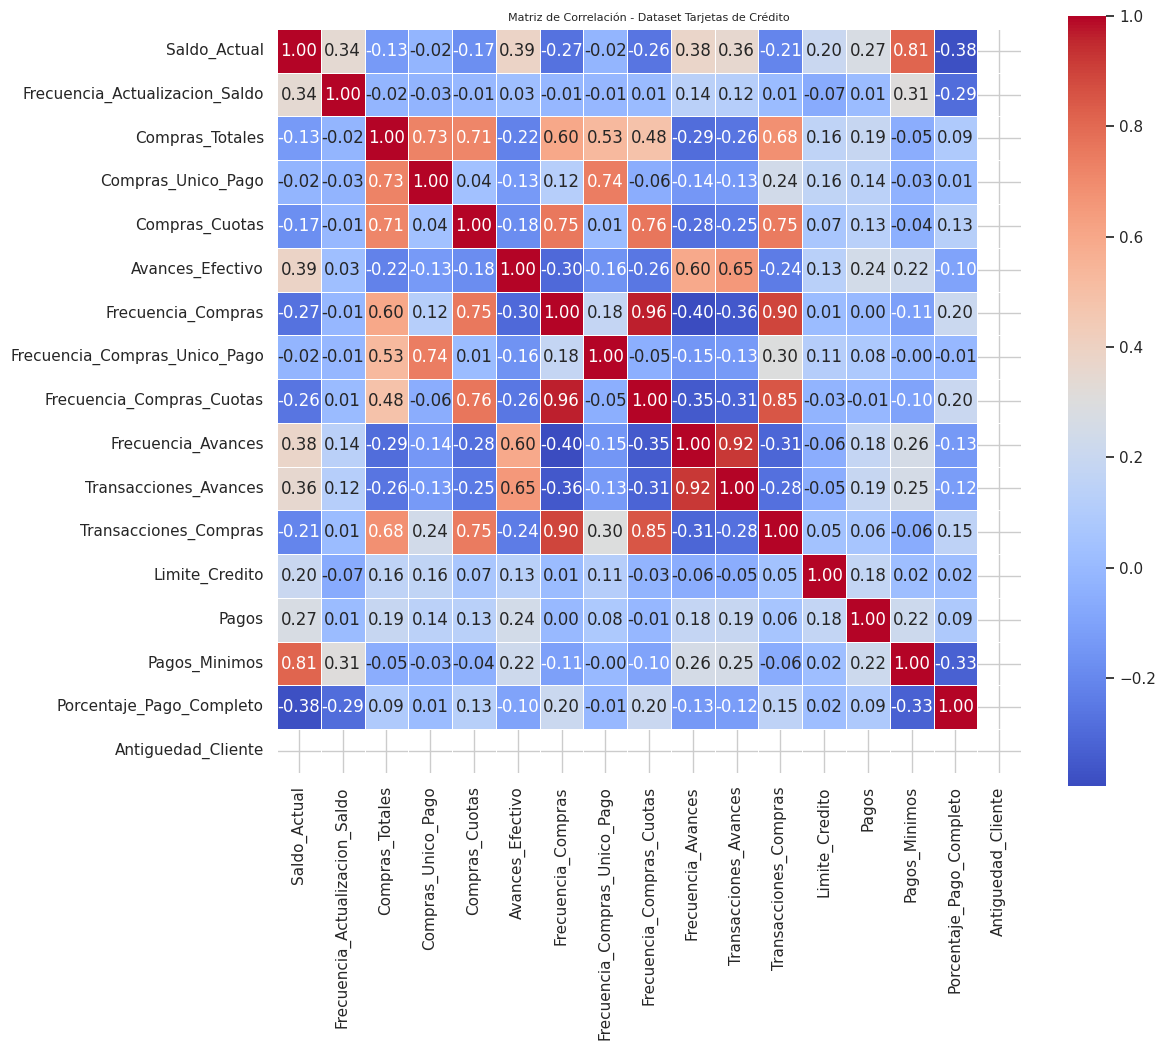

In [5]:

df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()

# Graficar Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Matriz de Correlación - Dataset Tarjetas de Crédito", fontsize=8)
plt.show()


# Mejores variables para determinar relaciones

In [6]:

# Seleccionar columnas numéricas
num = df.select_dtypes(include=["float64", "int64"]).dropna()

# Buscar el mejor par de variables para K-Means
cols = num.columns
results = []

for c1, c2 in itertools.combinations(cols, 2):
    X = num[[c1, c2]].values

    # Escalar
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # KMeans con k=3
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xs)

    # Silhouette
    sil = silhouette_score(Xs, labels)
    results.append((c1, c2, sil))

# Ordenar top 10 pares con mejor separación
top_pairs = sorted(results, key=lambda x: x[2], reverse=True)[:10]

top_pairs

[('Porcentaje_Pago_Completo',
  'Antiguedad_Cliente',
  np.float64(0.9601266007015192)),
 ('Frecuencia_Actualizacion_Saldo',
  'Antiguedad_Cliente',
  np.float64(0.9258482932303824)),
 ('Frecuencia_Compras_Unico_Pago',
  'Antiguedad_Cliente',
  np.float64(0.8607397160271899)),
 ('Frecuencia_Actualizacion_Saldo',
  'Porcentaje_Pago_Completo',
  np.float64(0.8551610358943812)),
 ('Frecuencia_Avances', 'Antiguedad_Cliente', np.float64(0.8055602043776575)),
 ('Frecuencia_Compras_Cuotas',
  'Antiguedad_Cliente',
  np.float64(0.8041963198564587)),
 ('Compras_Unico_Pago', 'Antiguedad_Cliente', np.float64(0.7987915259939902)),
 ('Avances_Efectivo', 'Antiguedad_Cliente', np.float64(0.7718497914664345)),
 ('Frecuencia_Actualizacion_Saldo',
  'Compras_Unico_Pago',
  np.float64(0.7612645672233624)),
 ('Compras_Cuotas', 'Antiguedad_Cliente', np.float64(0.7485796309331105))]

# Transformaciones

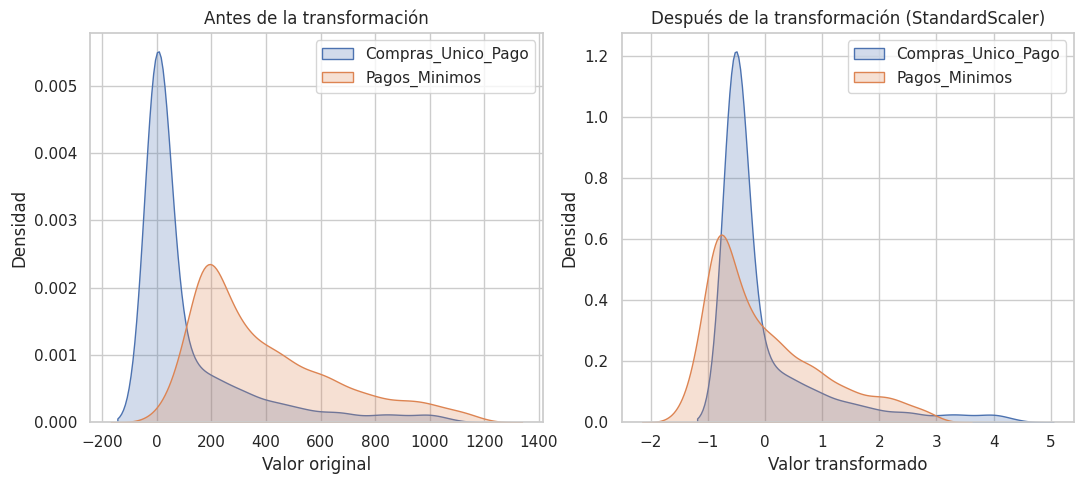

In [7]:
# 3. Seleccionar 2,3 o más variables NUMÉRICAS para comparar ---- se puede comparar más columnas
cols = ['Compras_Unico_Pago', 'Pagos_Minimos', ]
data = df[cols].dropna()

# 4. Transformación (Estandarización)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=cols)

# 5. Gráfico: Antes vs Después de la transformación
plt.figure(figsize=(11, 5))

# SUBPLOT 1: Antes de la transformación
plt.subplot(1, 2, 1)
for col in cols:
    sns.kdeplot(data[col], label=col, fill=True)

plt.title("Antes de la transformación", fontsize=12)
plt.xlabel("Valor original")
plt.ylabel("Densidad")
plt.legend()

# Después de la transformación
# --------------------------------------------------------------
plt.subplot(1, 2, 2)
for col in cols:
    sns.kdeplot(data_scaled[col], label=col, fill=True)

plt.title("Después de la transformación (StandardScaler)", fontsize=12)
plt.xlabel("Valor transformado")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()


# Histogramas

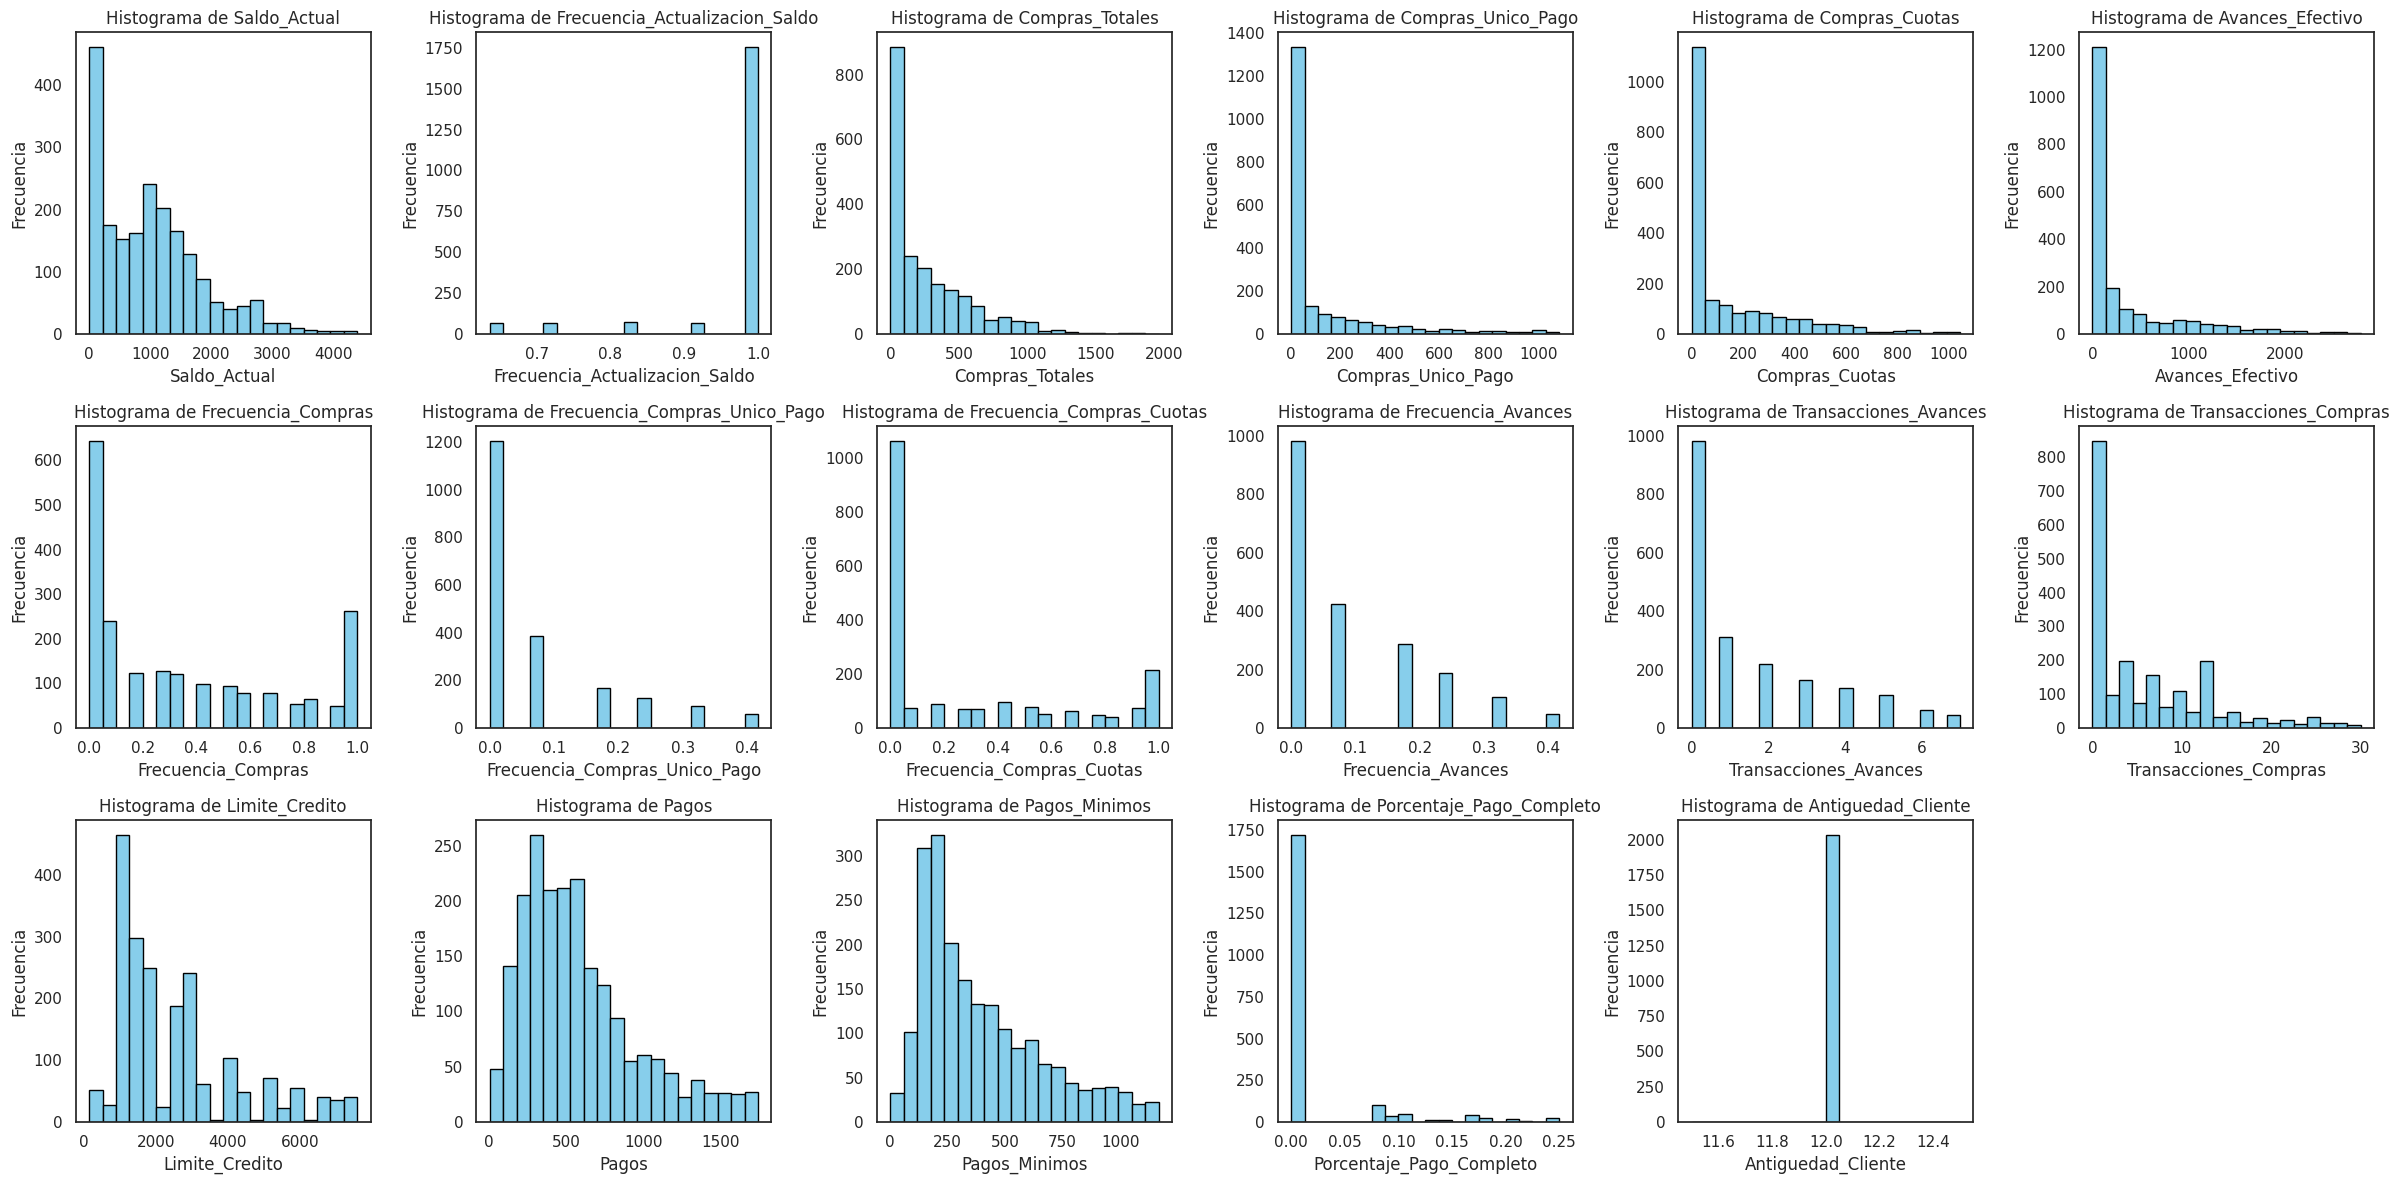

In [11]:

# Variables numéricas
variables = [
    'Saldo_Actual', 'Frecuencia_Actualizacion_Saldo', 'Compras_Totales',
    'Compras_Unico_Pago', 'Compras_Cuotas', 'Avances_Efectivo',
    'Frecuencia_Compras', 'Frecuencia_Compras_Unico_Pago',
    'Frecuencia_Compras_Cuotas', 'Frecuencia_Avances',
    'Transacciones_Avances', 'Transacciones_Compras', 'Limite_Credito',
    'Pagos', 'Pagos_Minimos', 'Porcentaje_Pago_Completo',
    'Antiguedad_Cliente'
]

# Crear figura con 3 filas y 6 columnas (18 espacios)
fig, axes = plt.subplots(3, 6, figsize=(24, 12))
axes = axes.flatten()  # Facilita indexar los subplots

for i, atr in enumerate(variables):
    axes[i].hist(df[atr], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(f'Histograma de {atr}')
    axes[i].set_xlabel(atr)
    axes[i].set_ylabel('Frecuencia')

# Desactivar los ejes sobrantes (si hay menos de 18 gráficas)
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **Análisis Bivariado**

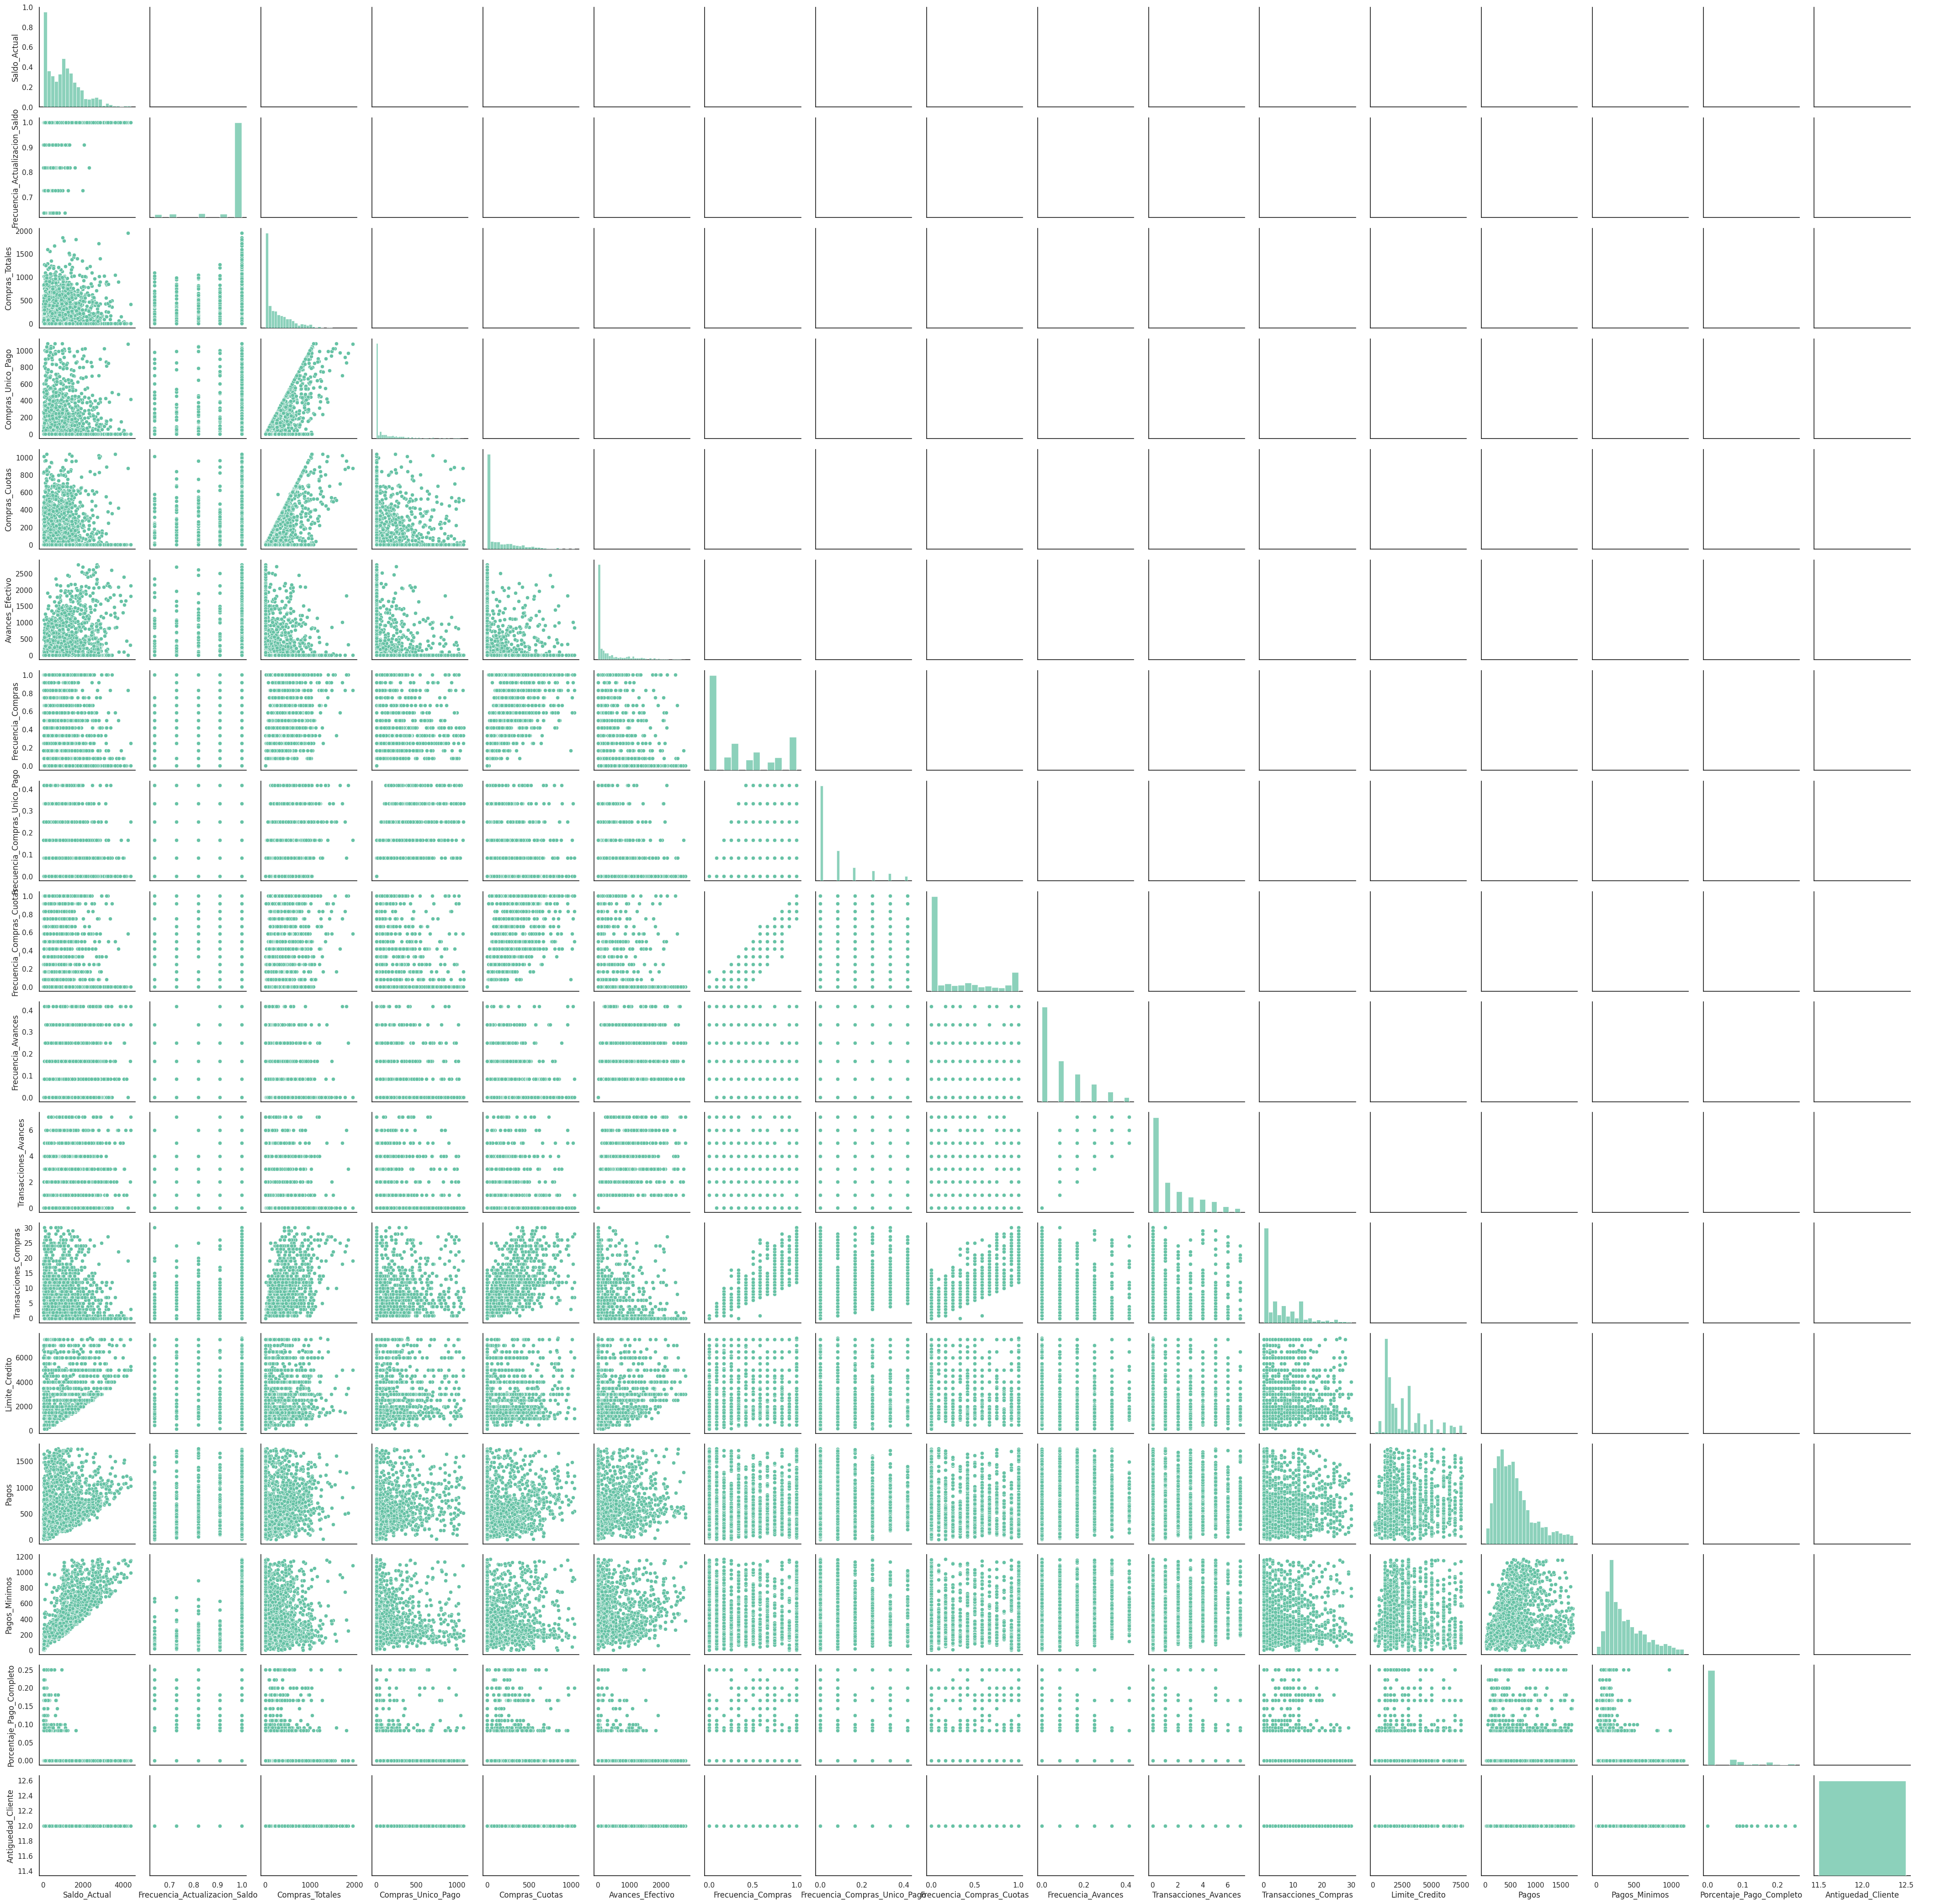

In [9]:

# analisis de relaciones de forma empirica de correlación de datos

sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

# **Graficar Elbow y Silhouette y desición de variables para el modelo**

Columnas numéricas usadas:
Index(['Saldo_Actual', 'Frecuencia_Actualizacion_Saldo', 'Compras_Totales',
       'Compras_Unico_Pago', 'Compras_Cuotas', 'Avances_Efectivo',
       'Frecuencia_Compras', 'Frecuencia_Compras_Unico_Pago',
       'Frecuencia_Compras_Cuotas', 'Frecuencia_Avances',
       'Transacciones_Avances', 'Transacciones_Compras', 'Limite_Credito',
       'Pagos', 'Pagos_Minimos', 'Porcentaje_Pago_Completo',
       'Antiguedad_Cliente'],
      dtype='object')

Total variables numéricas: 17


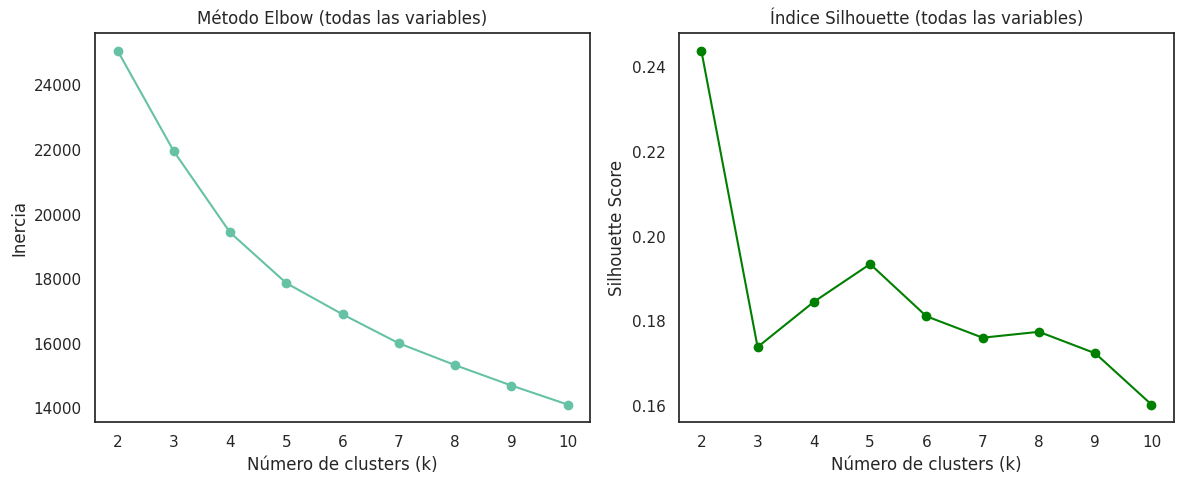


 Mejor número de clusters según silhouette: 2

======= Resumen de Clusters =======


,Saldo_Actual,Frecuencia_Actualizacion_Saldo,Compras_Totales,Compras_Unico_Pago,Compras_Cuotas,Avances_Efectivo,Frecuencia_Compras,Frecuencia_Compras_Unico_Pago,Frecuencia_Compras_Cuotas,Frecuencia_Avances,Transacciones_Avances,Transacciones_Compras,Limite_Credito,Pagos,Pagos_Minimos,Porcentaje_Pago_Completo,Antiguedad_Cliente,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,1263.296055,0.978627,92.290041,71.985918,20.320449,478.522942,0.096803,0.053265,0.042245,0.130476,2.118367,1.510204,2497.387755,581.165387,436.915913,0.009459,12.0,0.0
1,664.482328,0.955668,517.462716,186.442420,331.457753,116.343194,0.719033,0.100823,0.634465,0.031379,0.544444,12.314815,2702.654321,587.897495,328.097133,0.035570,12.0,1.0


In [13]:

# Seleccionar solo variables numéricas
df_num = df.select_dtypes(include=['float64', 'int64']).dropna()

print("Columnas numéricas usadas:")
print(df_num.columns)
print("\nTotal variables numéricas:", len(df_num.columns))

# Escalado de todas las variables numéricas
scaler = StandardScaler()
X = scaler.fit_transform(df_num)

# Buscar K óptimo con Elbow y Silhouette usando TODAS las variables
inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Graficar Elbow y Silhouette en horizontal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker="o")
plt.title("Método Elbow (todas las variables)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, marker="o", color="green")
plt.title("Índice Silhouette (todas las variables)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Entrenar K-means final (usa el mejor K localizable por Silhouette)
best_k = silhouettes.index(max(silhouettes)) + 2   # +2 porque range inicia en 2
print(f"\n Mejor número de clusters según silhouette: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df_num['Cluster'] = kmeans_final.fit_predict(X)

# Resumen de cada cluster
cluster_summary = df_num.groupby('Cluster')[df_num.columns].mean()
print("\n======= Resumen de Clusters =======")
cluster_summary.head()


# **PERFÍL DE CADA CLÚSTER**

# **CREAR DESCRIPCIÓN DE PERFILES**

# **Creacion del modelo K-MEANS**



=== PERFILES DE CLUSTER ===


,Saldo_Actual,Frecuencia_Actualizacion_Saldo,Compras_Totales,Compras_Unico_Pago,Compras_Cuotas,Avances_Efectivo,Frecuencia_Compras,Frecuencia_Compras_Unico_Pago,Frecuencia_Compras_Cuotas,Frecuencia_Avances,Transacciones_Avances,Transacciones_Compras,Limite_Credito,Pagos,Pagos_Minimos,Porcentaje_Pago_Completo,Antiguedad_Cliente,Cluster
cluster,,,,,,,,,,,,,,,,,,
0,1376.175994,0.966424,273.640714,131.229965,142.507526,533.542576,0.323606,0.074042,0.254355,0.104675,1.789199,5.721254,3249.041812,611.628095,452.465403,0.016070,12.0,0.367596
1,1203.715914,0.963172,355.081934,183.601423,171.480511,396.651062,0.344890,0.096715,0.256083,0.072993,1.142336,6.277372,6110.583942,726.295556,376.041127,0.024516,12.0,0.456204
2,813.837550,0.972429,234.067296,95.676765,138.659099,223.667028,0.354465,0.065642,0.294440,0.088599,1.428812,5.746420,1439.932603,537.527431,369.191459,0.020603,12.0,0.399326



=== DESCRIPCIONES DE LOS CLUSTERS ===

--- CLUSTER 0 ---
Mantienen un saldo alto en la tarjeta. Realizan pocas compras y tienen baja actividad transaccional. Sus compras de pago único son reducidas. Hacen poco uso de compras a cuotas. Hacen uso considerable de avances de efectivo. Poseen un límite de crédito bajo o medio. Realizan pagos de bajo monto. Pagan el total de su deuda solo ocasionalmente.

--- CLUSTER 1 ---
Mantienen un saldo alto en la tarjeta. Realizan un volumen elevado de compras. Tienen preferencia por compras de pago único. Utilizan con frecuencia compras financiadas a cuotas. Hacen uso considerable de avances de efectivo. Disponen de un límite de crédito alto. Efectúan pagos altos mensualmente. Suelen pagar la totalidad de su deuda con mayor frecuencia.

--- CLUSTER 2 ---
Presentan un saldo bajo o moderado en su tarjeta. Realizan pocas compras y tienen baja actividad transaccional. Sus compras de pago único son reducidas. Hacen poco uso de compras a cuotas. Realizan p

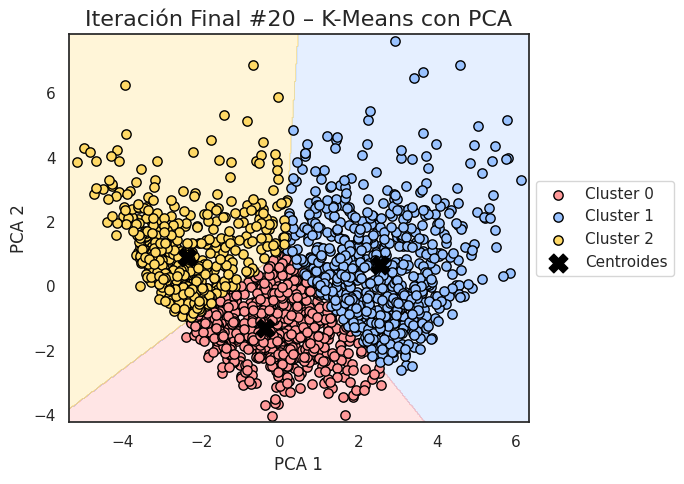

In [16]:

#  VARIABLES NUMÉRICAS A UTILIZAR
variables = ['Saldo_Actual', 'Frecuencia_Actualizacion_Saldo', 'Compras_Totales',
       'Compras_Unico_Pago', 'Compras_Cuotas', 'Avances_Efectivo',
       'Frecuencia_Compras', 'Frecuencia_Compras_Unico_Pago',
       'Frecuencia_Compras_Cuotas', 'Frecuencia_Avances',
       'Transacciones_Avances', 'Transacciones_Compras', 'Limite_Credito',
       'Pagos', 'Pagos_Minimos', 'Porcentaje_Pago_Completo',
       'Antiguedad_Cliente']

# Eliminar solo filas con NA en estas columnas
df_limpio = df.dropna(subset=variables).reset_index(drop=True)

# Construcción de matriz X
X = df_limpio[variables].values

# ESCALAMIENTO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# REDUCCIÓN A 2D PARA GRAFICAR (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# CONFIGURACIÓN DE K-MEANS DESDE CERO
k = 3               # <-- K se define a partir del Elbow
n_init = 50         # <-- 50 inicializaciones
max_iter = 20       # <-- 20 Número de iteraciones a mostrar

# Descripción de cada cluster
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=50)
df_num["cluster"] = kmeans_final.fit_predict(X)

# Descrición de perfiles
cluster_profiles = df_num.groupby("cluster").mean()
print("\n\n=== PERFILES DE CLUSTER ===")
display(cluster_profiles)

#
def descripcion_cluster(row):
    """Genera una descripción completa y profesional del perfil del cluster."""
    descripcion = []

    # --- SITUACIÓN DE SALDO ---
    if row["Saldo_Actual"] > cluster_profiles["Saldo_Actual"].mean():
        descripcion.append("Mantienen un saldo alto en la tarjeta.")
    else:
        descripcion.append("Presentan un saldo bajo o moderado en su tarjeta.")

    # --- NIVEL DE CONSUMO ---
    if row["Compras_Totales"] > cluster_profiles["Compras_Totales"].mean():
        descripcion.append("Realizan un volumen elevado de compras.")
    else:
        descripcion.append("Realizan pocas compras y tienen baja actividad transaccional.")

    # --- DISTRIBUCIÓN DE TIPOS DE COMPRA ---
    if row["Compras_Unico_Pago"] > cluster_profiles["Compras_Unico_Pago"].mean():
        descripcion.append("Tienen preferencia por compras de pago único.")
    else:
        descripcion.append("Sus compras de pago único son reducidas.")

    if row["Compras_Cuotas"] > cluster_profiles["Compras_Cuotas"].mean():
        descripcion.append("Utilizan con frecuencia compras financiadas a cuotas.")
    else:
        descripcion.append("Hacen poco uso de compras a cuotas.")

    # --- USO DE AVANCES ---
    if row["Avances_Efectivo"] > cluster_profiles["Avances_Efectivo"].mean():
        descripcion.append("Hacen uso considerable de avances de efectivo.")
    else:
        descripcion.append("Realizan pocos avances de efectivo.")

    # --- LÍMITE DE CRÉDITO ---
    if row["Limite_Credito"] > cluster_profiles["Limite_Credito"].mean():
        descripcion.append("Disponen de un límite de crédito alto.")
    else:
        descripcion.append("Poseen un límite de crédito bajo o medio.")

    # --- PAGOS ---
    if row["Pagos"] > cluster_profiles["Pagos"].mean():
        descripcion.append("Efectúan pagos altos mensualmente.")
    else:
        descripcion.append("Realizan pagos de bajo monto.")

    # --- PORCENTAJE DE PAGO COMPLETO ---
    if row["Porcentaje_Pago_Completo"] > cluster_profiles["Porcentaje_Pago_Completo"].mean():
        descripcion.append("Suelen pagar la totalidad de su deuda con mayor frecuencia.")
    else:
        descripcion.append("Pagan el total de su deuda solo ocasionalmente.")

    # Resultado final
    return " ".join(descripcion)


# Generar descripciones finales
descripciones_finales = cluster_profiles.apply(descripcion_cluster, axis=1)

print("\n=== DESCRIPCIONES DE LOS CLUSTERS ===")
for cluster_id, texto in descripciones_finales.items():
    print(f"\n--- CLUSTER {cluster_id} ---")
    print(texto)


# Centroides iniciales (semilla aleatoria)
np.random.seed(42)
initial_centroids = X_pca[np.random.choice(len(X_pca), k, replace=False)]
centroids = initial_centroids.copy()

#  FUNCIONES NECESARIAS PARA K-MEANS
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

# FUNCIÓN PARA GRAFICAR ITERACIONES
def plot_iteration_final(X, labels, centroids, iteration, k):

    # Definir límites del gráfico
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

    # Malla para dibujar fronteras
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # Clasificar cada punto de la malla
    Z = assign_clusters(np.c_[xx.ravel(), yy.ravel()], centroids)
    Z = Z.reshape(xx.shape)

    # Colores de clusters
    colors = ['#ff9999', '#99c2ff', '#ffd966']
    cmap = ListedColormap(colors)

    # Crear figura
    plt.figure(figsize=(7, 5))

    # Fronteras de decisión
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap)

    # Graficar puntos de cada cluster con etiquetas
    for i in range(k):
        plt.scatter(
            X[labels == i, 0], X[labels == i, 1],
            s=45, edgecolor='black', color=colors[i],
            label=f"Cluster {i}"
        )

    # Graficar centroides
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        c='black', s=180, marker='X', label='Centroides'
    )

    # Estética general
    plt.title(f"Iteración Final #{iteration} – K-Means con PCA", fontsize=16)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


# EJECUCIÓN DEL ALGORITMO
centroids = initial_centroids.copy()
for i in range(1, max_iter + 1):
    labels = assign_clusters(X_pca, centroids)

    # Solo mostrar la última iteración
    if i == max_iter:
        plot_iteration_final(X_pca, labels, centroids, i, k)

    # Actualizar centroides
    centroids = update_centroids(X_pca, labels, k)


**# Guardado de modelos entrenados**

In [19]:

# Guardar scaler entrenado
joblib.dump(scaler, "scaler.pkl")
print("✔ scaler.pkl guardado")

# Guardar modelo K-Means final
joblib.dump(kmeans_final, "modelo_kmeans.pkl")
print("✔ modelo_kmeans.pkl guardado")

# Guardar lista de variables usadas por el modelo
joblib.dump(variables, "variables.pkl")
print("✔ variables.pkl guardado")

# OPCIONAL: guardar PCA  para graficar
joblib.dump(pca, "pca.pkl")
print("✔ pca.pkl (opcional) guardado")

print("\n=== ARCHIVOS GENERADOS CORRECTAMENTE ===")


✔ scaler.pkl guardado
✔ modelo_kmeans.pkl guardado
✔ variables.pkl guardado
✔ pca.pkl (opcional) guardado

=== ARCHIVOS GENERADOS CORRECTAMENTE ===


In [ ]:
# Descargar archivos  del modelo  que van en el backend
from google.colab import files

# Descargar cada archivo
files.download("scaler.pkl")
files.download("modelo_kmeans.pkl")
files.download("variables.pkl")
files.download("pca.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**

Con el proceso de análisis de gráficas de los datos nos permitio conocer como estan los datos del dataset y asi mismo permitió identificar con el módelo tres perfiles de clientes basados en sus hábitos financieros, niveles de consumo, uso del crédito y comportamiento de pagos

El modelo K-Means con k = 3  que fue elejido con la gráfica de Elbow permitió identificar grupos bien diferenciados de clientes como:

*   Retención y fidelización para el grupo de alto consumo (Cluster 1).
*   Gestión de riesgo y prevención de mora para clientes del Cluster 2.
*   Optimización de ofertas y promociones para clientes del Cluster 0.

El objetivo no es predecir un valor futuro, sino clasificar si un cliente nuevo se parece más al patrón A, B o C. En este caso a cual de los tres cluster pertenece y a su comportamiento desigando segun análisis.

Eso es extremadamente valioso porque: mejora la segmentación de los clientes para identificación, permite ofrecer productos adecuados centrados en cada cliente, ayuda a gestionar costos y optimiza campañas de marketing.
